In [2]:
# imports
import numpy as np
import skimage
import cv2
import matplotlib.pyplot as plt
from scipy.spatial import distance
import scipy 


##############################################
### Provided code - nothing to change here ###
##############################################

"""
Harris Corner Detector
Usage: Call the function harris(filename) for corner detection
Reference   (Code adapted from):
             http://www.kaij.org/blog/?p=89
             Kai Jiang - Harris Corner Detector in Python
             
"""
from pylab import *
from scipy import signal
from scipy import *
import numpy as np
from PIL import Image

def harris(filename, min_distance = 10, threshold = 0.1):
    """
    filename: Path of image file
    threshold: (optional)Threshold for corner detection
    min_distance : (optional)Minimum number of pixels separating 
     corners and image boundary
    """
    im = np.array(Image.open(filename).convert("L"))
    harrisim = compute_harris_response(im)
    filtered_coords = get_harris_points(harrisim,min_distance, threshold)
    #print(filtered_coords)
    plot_harris_points(im, filtered_coords)
    return filtered_coords

def gauss_derivative_kernels(size, sizey=None):
    """ returns x and y derivatives of a 2D 
        gauss kernel array for convolutions """
    size = int(size)
    if not sizey:
        sizey = size
    else:
        sizey = int(sizey)
    y, x = mgrid[-size:size+1, -sizey:sizey+1]
    #x and y derivatives of a 2D gaussian with standard dev half of size
    # (ignore scale factor)
    gx = - x * exp(-(x**2/float((0.5*size)**2)+y**2/float((0.5*sizey)**2))) 
    gy = - y * exp(-(x**2/float((0.5*size)**2)+y**2/float((0.5*sizey)**2))) 
    return gx,gy

def gauss_kernel(size, sizey = None):
    """ Returns a normalized 2D gauss kernel array for convolutions """
    size = int(size)
    if not sizey:
        sizey = size
    else:
        sizey = int(sizey)
    x, y = mgrid[-size:size+1, -sizey:sizey+1]
    g = exp(-(x**2/float(size)+y**2/float(sizey)))
    return g / g.sum()

def compute_harris_response(im):
    """ compute the Harris corner detector response function 
        for each pixel in the image"""
    #derivatives
    gx,gy = gauss_derivative_kernels(3)
    imx = signal.convolve(im,gx, mode='same')
    imy = signal.convolve(im,gy, mode='same')
    #kernel for blurring
    gauss = gauss_kernel(3)
    #compute components of the structure tensor
    Wxx = signal.convolve(imx*imx,gauss, mode='same')
    Wxy = signal.convolve(imx*imy,gauss, mode='same')
    Wyy = signal.convolve(imy*imy,gauss, mode='same')   
    #determinant and trace
    Wdet = Wxx*Wyy - Wxy**2
    Wtr = Wxx + Wyy   
    return Wdet / Wtr

def get_harris_points(harrisim, min_distance=10, threshold=0.1):
    """ return corners from a Harris response image
        min_distance is the minimum nbr of pixels separating 
        corners and image boundary"""
    #find top corner candidates above a threshold
    corner_threshold = max(harrisim.ravel()) * threshold
    harrisim_t = (harrisim > corner_threshold) * 1    
    #get coordinates of candidates
    candidates = harrisim_t.nonzero()
    coords = [ (candidates[0][c],candidates[1][c]) for c in range(len(candidates[0]))]
    #...and their values
    candidate_values = [harrisim[c[0]][c[1]] for c in coords]    
    #sort candidates
    index = argsort(candidate_values)   
    #store allowed point locations in array
    allowed_locations = zeros(harrisim.shape)
    allowed_locations[min_distance:-min_distance,min_distance:-min_distance] = 1   
    #select the best points taking min_distance into account
    filtered_coords = []
    for i in index:
        if allowed_locations[coords[i][0]][coords[i][1]] == 1:
            filtered_coords.append(coords[i])
            allowed_locations[(coords[i][0]-min_distance):(coords[i][0]+min_distance),
                (coords[i][1]-min_distance):(coords[i][1]+min_distance)] = 0               
    return filtered_coords

def plot_harris_points(image, filtered_coords):
    """ plots corners found in image"""
    figure()
    gray()
    imshow(image)
    plot([p[1] for p in filtered_coords],[p[0] for p in filtered_coords],'r*')
    axis('off')
    show()

# Usage: 
#harris('./path/to/image.jpg')


# Provided code for plotting inlier matches between two images

def plot_inlier_matches(ax, img1, img2, inliers):
    """
    Plot the matches between two images according to the matched keypoints
    :param ax: plot handle
    :param img1: left image
    :param img2: right image
    :inliers: x,y in the first image and x,y in the second image (Nx4)
    """
    res = np.hstack([img1, img2])
    ax.set_aspect('equal')
    ax.imshow(res, cmap='gray')
    
    ax.plot(inliers[:,0], inliers[:,1], '+r')
    ax.plot(inliers[:,2] + img1.shape[1], inliers[:,3], '+r')
    ax.plot([inliers[:,0], inliers[:,2] + img1.shape[1]],
            [inliers[:,1], inliers[:,3]], 'r', linewidth=0.4)
    ax.axis('off')
    
# Usage:
# fig, ax = plt.subplots(figsize=(20,10))
# plot_inlier_matches(ax, img1, img2, computed_inliers)


#######################################
### Your implementation starts here ###
#######################################

# See assignment page for the instructions!

In [3]:
img1 = cv2.imread('1.jpeg')

img1_g = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.imread('2.jpeg') 

img2_g = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)


# cord1 = harris('1.jpeg')
# cord2 = harris('2.jpeg')



sift = cv2.SIFT_create()

kp1, des1 = sift.detectAndCompute(img1_g, None)


kp2, des2 = sift.detectAndCompute(img2_g, None)


# imga = cv2.drawKeypoints(img1_g, kp1, img1)
# cv2.imwrite('sift_keypoints_a.jpg', imga)

# imgb = cv2.drawKeypoints(img2_g, kp2, img2)
# cv2.imwrite('sift_keypoints_b.jpg', imgb)


[ WARN:0@4.680] global /Users/runner/work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('1.jpeg'): can't open/read file: check file path/integrity


error: OpenCV(4.5.5) /Users/runner/work/opencv-python/opencv-python/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [4]:
res = scipy.spatial.distance.cdist(des1, des2,'sqeuclidean')

thresh_val = 8000

thresh = np.where(res <  thresh_val, res, 0)

nozero = np.transpose(np.nonzero(thresh))

match = []
for i in nozero:
    match.append((kp1[i[0]].pt, kp2[i[1]].pt))

print(len(match))


NameError: name 'des1' is not defined

RANSAC

(29, 4)
1988.1911902480745


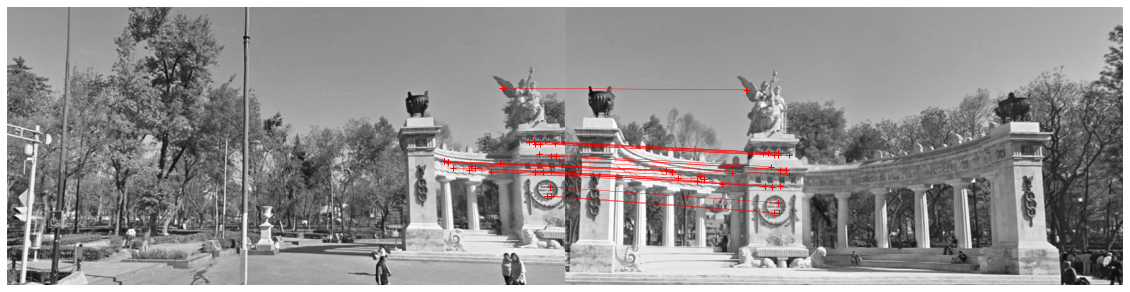

In [ ]:
iteration = 30000
max_inlier = 0
thresh = 250
min_error = float('inf')


for _ in range(iteration):

    inlier = 0
    pts_src = []
    pts_dst = []
   
    randomRows = np.random.randint(len(match), size=4)
    for i in randomRows:
        pts_src.append(match[i][0])
        pts_dst.append(match[i][1])
        
    h, status = cv2.findHomography(np.array(pts_src), np.array(pts_dst), method = cv2.RANSAC)

    if h is None:
        continue
    error = 0
    inliers = []

    mcopy = match.copy()
    for i, j in mcopy:
        
        k = np.dot(h, np.concatenate((i, [1]), axis = 0))
        #k = k/k[-1]
        cur = ((j[0] - k[0])**2 + (j[1] - k[1])**2)
        error += cur
        if cur < thresh:
            
            inlier += 1
            inliers.append(list(i + j))
            

   
    
    if inlier > max_inlier: # and error < min_error:

        min_error = error 
        max_inlier = inlier
        best_h = h.copy()  
        best_inliers = np.array(inliers.copy())
    

print(best_inliers.shape)
print(min_error/max_inlier)

fig, ax = plt.subplots(figsize=(20,10))
plot_inlier_matches(ax, img1_g, img2_g, best_inliers)



Stiching

In [ ]:
def stiching(img1, img2, h):
    h, w, c = img1.shape

    p1 = np.float32([[0, 0], [0, h], [w, h], [w, 0]]).reshape(-1, 1, 2)


    q = np.concatenate((p1, cv2.perspectiveTransform(p1, best_h)), axis=0)
    #print(q)


    km = np.int32(np.amin(q, axis=0))
    xm = km[0][0]
    ym = km[0][1]

    h_m = np.array([[1, 0, -xm], [0, 1, -ym], [0, 0, 1]])

    om =  np.int32(np.amax(q, axis=0))
    xma = om[0][0]
    yma = om[0][1]


    output = cv2.warpPerspective(img2, h_m.dot(best_h), (xma-xm, yma-ym))    

    l, m, o = output.shape

    for i in range(h):
        for j in range(w):
            if -xm + j < m and -ym + i < l:
                if np.count_nonzero(output[-ym + i, -xm + j]) == 0:
                    output[-ym + i, -xm + j, :] = img1[i, j, :]
                else:
                    output[-ym + i, -xm + j] = output[-ym + i, -xm + j]
                    



    res = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)
    plt.imshow(res)
    plt.show()
    plt.imsave('aa2.jpg', res)

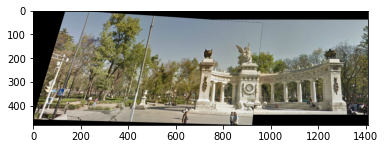

In [ ]:
stiching(img2, img1, best_h)